## Modern Portfolio Theory Markowitz theory

The purpose of this is to help the investor create a portfolio that maximizes returns for a given level of risk that the investor is willing to take. 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

In [3]:
KEC = pd.read_csv('KEC.csv')
mazagon = pd.read_csv('mazgon.csv')
reliance = pd.read_csv('Reliance.csv')
tata_motors = pd.read_csv('Tatamotors.csv')

In [4]:
assets = ['KEC', 'mazagon', 'reliance', 'tata_motors']

In [5]:
def set_datetime(dataframe):
    dataframe.set_index('Date ', inplace = True)

In [6]:
set_datetime(KEC)
set_datetime(mazagon)
set_datetime(reliance)
set_datetime(tata_motors)

In [7]:
KEC['vwap ']= (KEC['vwap '].astype(str).str.replace(',', '', regex=False).str.strip().astype(float))
mazagon['vwap ']= (mazagon['vwap '].astype(str).str.replace(',', '', regex=False).str.strip().astype(float))
reliance['vwap ']= (reliance['vwap '].astype(str).str.replace(',', '', regex=False).str.strip().astype(float))
tata_motors['vwap ']= (tata_motors['vwap '].astype(str).str.replace(',', '', regex=False).str.strip().astype(float))

In [8]:
data = pd.concat([KEC,mazagon, reliance, tata_motors], axis =1, keys = assets)
for stock in assets:
    # Strip trailing space from column name if needed
    data[stock].columns = data[stock].columns.str.rstrip()
data

KEC                                                       \
            series    OPEN    HIGH     LOW  PREV. CLOSE     ltp   close    
Date                                                                       
30-May-2025      EQ  864.70  866.00  826.50       864.85  830.75  832.40   
29-May-2025      EQ  875.15  878.80  860.25       875.10  864.55  864.85   
28-May-2025      EQ  867.50  879.50  859.20       861.70  872.20  875.10   
27-May-2025      EQ  890.00  926.65  853.45       861.45  860.00  861.70   
26-May-2025      EQ  820.00  875.00  808.65       815.15  867.90  861.45   
...             ...     ...     ...     ...          ...     ...     ...   
07-Jun-2024      EQ  775.00  781.60  764.70       770.85  770.00  768.35   
06-Jun-2024      EQ  725.05  784.50  725.05       719.90  771.85  770.85   
05-Jun-2024      EQ  730.00  744.25  699.20       696.90  720.00  719.90   
04-Jun-2024      EQ  775.00  779.20  671.05       775.00  694.00  696.90   
03-Jun-2024      EQ  784.00  784.00  755.00       738.50  774.00  775.00   

                                       ... tata_motors                       \
              vwap     52W H   52W L   ...        LOW  PREV. CLOSE     ltp    
Date                                   ...                                    
30-May-2025  840.27  1,313.25  627.45  ...      712.50       724.45  718.65   
29-May-2025  865.57  1,313.25  627.45  ...      720.00       717.95  725.45   
28-May-2025  870.41  1,313.25  627.45  ...      716.20       716.45  717.25   
27-May-2025  897.26  1,313.25  627.45  ...      715.20       729.00  717.00   
26-May-2025  848.68  1,313.25  627.45  ...      721.20       718.25  729.20   
...             ...       ...     ...  ...         ...          ...     ...   
07-Jun-2024  772.94    838.85  523.25  ...      935.25       938.25  970.00   
06-Jun-2024  770.62    838.85  523.25  ...      931.20       929.95  939.50   
05-Jun-2024  718.25    838.85  523.25  ...      890.00       903.90  928.00   
04-Jun-2024  728.58    838.85  523.25  ...      855.40       950.45  904.95   
03-Jun-2024  772.79    838.85  523.25  ...      934.00       923.00  951.50   

                                                            \
             close    vwap     52W H   52W L       VOLUME    
Date                                                         
30-May-2025  719.50  718.99  1,179.00  535.75  1,45,33,919   
29-May-2025  724.45  723.93  1,179.00  535.75    88,38,921   
28-May-2025  717.95  719.01  1,179.00  535.75    75,68,961   
27-May-2025  716.45  719.68  1,179.00  535.75  1,22,23,125   
26-May-2025  729.00  731.82  1,179.00  535.75  1,30,17,400   
...             ...     ...       ...     ...          ...   
07-Jun-2024  970.50  959.91  1,065.60  537.90  1,55,77,866   
06-Jun-2024  938.25  939.29  1,065.60  537.90  1,17,92,640   
05-Jun-2024  929.95  917.55  1,065.60  537.90  1,37,52,553   
04-Jun-2024  903.90  903.72  1,065.60  537.90  2,65,54,598   
03-Jun-2024  950.45  945.99  1,065.60  537.90  1,23,14,329   

                                               
                         VALUE  No of trades   
Date                                           
30-May-2025  10,44,97,31,838.45      1,70,723  
29-May-2025   6,39,87,30,595.85      1,36,523  
28-May-2025   5,44,21,27,705.70      1,17,049  
27-May-2025   8,79,67,82,486.15      2,13,762  
26-May-2025   9,52,64,31,160.15      1,74,194  
...                         ...           ...  
07-Jun-2024  14,95,32,76,886.75      3,19,681  
06-Jun-2024  11,07,67,24,156.05      3,58,066  
05-Jun-2024  12,61,87,06,601.05      3,47,081  
04-Jun-2024  23,99,79,86,160.70      8,13,215  
03-Jun-2024  11,64,91,70,721.05      3,03,950  

[247 rows x 52 columns]

In [9]:
data.columns.names = ['Company', 'Info']
data

Company         KEC                                                       \
Info        series    OPEN    HIGH     LOW  PREV. CLOSE     ltp   close    
Date                                                                       
30-May-2025      EQ  864.70  866.00  826.50       864.85  830.75  832.40   
29-May-2025      EQ  875.15  878.80  860.25       875.10  864.55  864.85   
28-May-2025      EQ  867.50  879.50  859.20       861.70  872.20  875.10   
27-May-2025      EQ  890.00  926.65  853.45       861.45  860.00  861.70   
26-May-2025      EQ  820.00  875.00  808.65       815.15  867.90  861.45   
...             ...     ...     ...     ...          ...     ...     ...   
07-Jun-2024      EQ  775.00  781.60  764.70       770.85  770.00  768.35   
06-Jun-2024      EQ  725.05  784.50  725.05       719.90  771.85  770.85   
05-Jun-2024      EQ  730.00  744.25  699.20       696.90  720.00  719.90   
04-Jun-2024      EQ  775.00  779.20  671.05       775.00  694.00  696.90   
03-Jun-2024      EQ  784.00  784.00  755.00       738.50  774.00  775.00   

Company                                ... tata_motors                       \
Info          vwap     52W H   52W L   ...        LOW  PREV. CLOSE     ltp    
Date                                   ...                                    
30-May-2025  840.27  1,313.25  627.45  ...      712.50       724.45  718.65   
29-May-2025  865.57  1,313.25  627.45  ...      720.00       717.95  725.45   
28-May-2025  870.41  1,313.25  627.45  ...      716.20       716.45  717.25   
27-May-2025  897.26  1,313.25  627.45  ...      715.20       729.00  717.00   
26-May-2025  848.68  1,313.25  627.45  ...      721.20       718.25  729.20   
...             ...       ...     ...  ...         ...          ...     ...   
07-Jun-2024  772.94    838.85  523.25  ...      935.25       938.25  970.00   
06-Jun-2024  770.62    838.85  523.25  ...      931.20       929.95  939.50   
05-Jun-2024  718.25    838.85  523.25  ...      890.00       903.90  928.00   
04-Jun-2024  728.58    838.85  523.25  ...      855.40       950.45  904.95   
03-Jun-2024  772.79    838.85  523.25  ...      934.00       923.00  951.50   

Company                                                     \
Info         close    vwap     52W H   52W L       VOLUME    
Date                                                         
30-May-2025  719.50  718.99  1,179.00  535.75  1,45,33,919   
29-May-2025  724.45  723.93  1,179.00  535.75    88,38,921   
28-May-2025  717.95  719.01  1,179.00  535.75    75,68,961   
27-May-2025  716.45  719.68  1,179.00  535.75  1,22,23,125   
26-May-2025  729.00  731.82  1,179.00  535.75  1,30,17,400   
...             ...     ...       ...     ...          ...   
07-Jun-2024  970.50  959.91  1,065.60  537.90  1,55,77,866   
06-Jun-2024  938.25  939.29  1,065.60  537.90  1,17,92,640   
05-Jun-2024  929.95  917.55  1,065.60  537.90  1,37,52,553   
04-Jun-2024  903.90  903.72  1,065.60  537.90  2,65,54,598   
03-Jun-2024  950.45  945.99  1,065.60  537.90  1,23,14,329   

Company                                        
Info                     VALUE  No of trades   
Date                                           
30-May-2025  10,44,97,31,838.45      1,70,723  
29-May-2025   6,39,87,30,595.85      1,36,523  
28-May-2025   5,44,21,27,705.70      1,17,049  
27-May-2025   8,79,67,82,486.15      2,13,762  
26-May-2025   9,52,64,31,160.15      1,74,194  
...                         ...           ...  
07-Jun-2024  14,95,32,76,886.75      3,19,681  
06-Jun-2024  11,07,67,24,156.05      3,58,066  
05-Jun-2024  12,61,87,06,601.05      3,47,081  
04-Jun-2024  23,99,79,86,160.70      8,13,215  
03-Jun-2024  11,64,91,70,721.05      3,03,950  

[247 rows x 52 columns]

# Now let's calculate the returns

using VWAP which stands for Volume Weighted Average Price, a technical indicator that helps traders determine the average price of a security throughout a trading session

In [11]:
returns = pd.DataFrame()
for stock in assets:
    returns[stock + ' Returns'] = data[stock]['vwap '].pct_change()
returns.head()

,KEC Returns,mazagon Returns,reliance Returns,tata_motors Returns
Date,,,,
30-May-2025,NaN,NaN,NaN,NaN
29-May-2025,0.030109,0.056836,-0.003641,0.006871
28-May-2025,0.005592,-0.016424,0.000191,-0.006796
27-May-2025,0.030848,-0.008473,0.004820,0.000932
26-May-2025,-0.054143,-0.019219,0.010796,0.016869


The code below shows the calculation of average annual returns and annual covariance. The covariance is calculated by using the .cov() method which gives a covariance matrix. The daily returns and covariance are annualized by multiplying it by 247, since there are around 247 trading days in this year.

In [13]:
(returns.mean())*247

KEC Returns            0.030341
mazagon Returns        0.410011
reliance Returns       1.066564
tata_motors Returns    0.322055
dtype: float64

In [14]:
(returns.cov())*247

,KEC Returns,mazagon Returns,reliance Returns,tata_motors Returns
KEC Returns,0.229244,0.114615,0.030513,0.056236
mazagon Returns,0.114615,1.389100,0.047315,0.041830
reliance Returns,0.030513,0.047315,1.021632,0.021869
tata_motors Returns,0.056236,0.041830,0.021869,0.094456


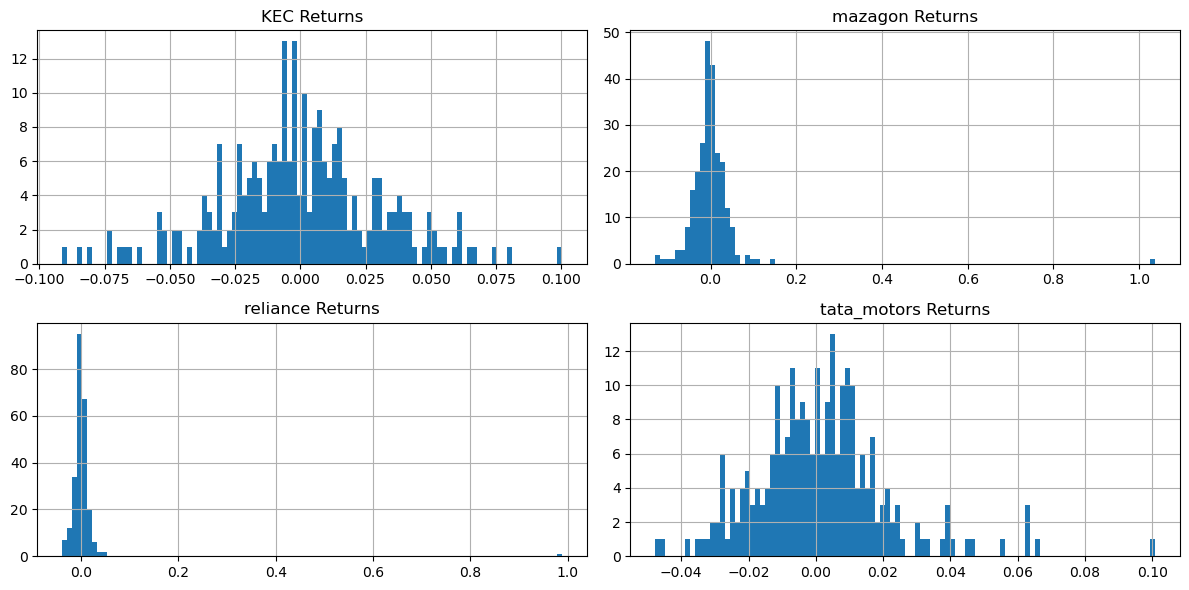

In [15]:
#The daily returns calculated can be visualized using a histogram
returns.hist(figsize=(12,6),bins =100)
plt.tight_layout()

## Monte Carlo simulation 
for assessing the potential outcomes of different investment strategies under varying conditions. It involves generating multiple scenarios based on statistical models and random sampling. Implementing Monte Carlo simulation in Python involves combining statistical analysis, simulation, and optimization techniques to gain insights into portfolio performance under different allocations. For our analysis, we will run a simulation on different allocations of the same stocks to find the optimum allocation. A single run of the simulation is shown in the code below.

Portfolio Variance=w 
⊤
 ⋅Σ 
annual
​
 ⋅w

 wt is transpose of the weights matrix
 Σannual = is the annualized return which is multiplied by 247

 Portfolio Volatility= square root of(
w 
⊤
 ⋅Σ 
annual
​
 ⋅w)
​
We would now be looking at a basic portfolio optimization process where we'll be calculating return, volatility and sharpe ratio with random weights.

In [17]:
#Single run
np.random.seed(156)#This will give the same random output everytime you run it
print(assets)
weights = np.array(np.random.random(4))
print('Random Weights')
print(weights)
print('Rebalanced Weights')
weights = weights/np.sum(weights)
print(weights)
print('Portfolio Return')
ret = np.sum(returns.mean()*247*weights)
print(ret)
print('Expected Volatility')
volatility = np.sqrt(np.dot(weights.T, np.dot(returns.cov()*247, weights)))
print(volatility)
print("Sharpe Ratio")
sr=(ret - 0.075)/volatility #Here we're taking the risk free rate as 7.5%
print(sr)

['KEC', 'mazagon', 'reliance', 'tata_motors']
Random Weights
[0.31361951 0.55900035 0.26243533 0.18746829]
Rebalanced Weights
[0.23713719 0.42267707 0.19843529 0.14175045]
Portfolio Return
0.43779263348265113
Expected Volatility
0.5890644025604829
Sharpe Ratio
0.615879404536588


# Interpretation

(𝑅
𝑝
−
𝑅
𝑓)/
𝜎
𝑝


Where:

𝑅
𝑝
​
  = Portfolio return

𝑅
𝑓
​
  = Risk-free rate (e.g., return of U.S. Treasury bills)

𝜎
𝑝
​
  = Standard deviation (volatility) of the portfolio's returns

📌 Interpretation:
A higher Sharpe Ratio means better risk-adjusted returns.

A Sharpe ratio > 1 is generally considered good, > 2 is very good, and > 3 is excellent.
​


Having seen a single run, we'll be doing this for 5000 simulations of the random allocations generated to find the optimum allocation for the four sticks chosen. The portfolio perfomance will be analyzed based on the Sharpe ratio. The sharpe ratio gives the return delivered per unit of risk taken.

In [20]:
simulations = 5000
all_weights = np.zeros((simulations,len(assets)))
ret_arr = np.zeros(simulations)
vol_arr = np.zeros(simulations)
sharpe_arr = np.zeros(simulations)

for i in range(simulations):
    #weights
    weights = np.array(np.random.random(4))
    weights = weights/np.sum(weights)
    all_weights[i,:]=weights
    #Expected returns
    ret_arr[i] = np.sum(returns.mean()*247*weights)
    #Expected Volatility
    vol_arr[i] = np.sqrt(np.dot(weights.T, np.dot(returns.cov()*247, weights)))
    #Sharpe ratio
    sharpe_arr[i] = (ret_arr[i]-0.075)/vol_arr[i]

In [21]:
sharpe_arr.max()

1.2357986130457246

In [22]:
sharpe_arr.argmax()#Returns the index of the highest value in that array

3291

In [23]:
np.round(all_weights[3291,:],3)*100#to round off an array

array([ 0.1,  2.6, 26.9, 70.4])

In [24]:
print(assets)

['KEC', 'mazagon', 'reliance', 'tata_motors']


In [25]:
#This gives us the allocation based on the maximum sharpe ration for our risk appetite

In [26]:
sharpe_max_vol=vol_arr[3291]
sharpe_max_ret=ret_arr[3291]

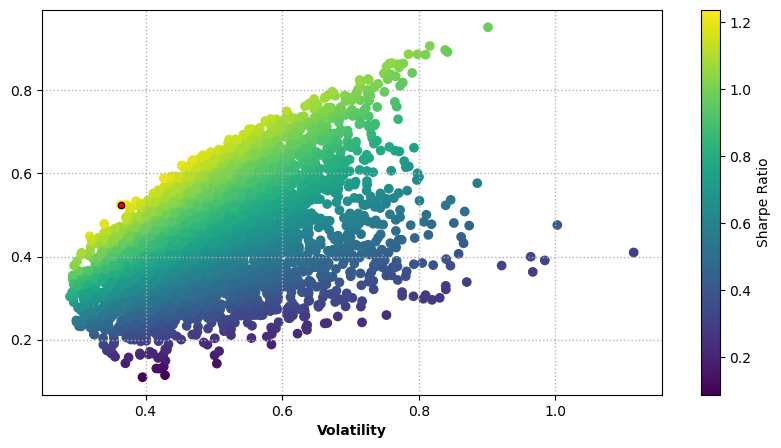

In [64]:
plt.figure(figsize = (10,5))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap = 'viridis')
plt.colorbar(label = 'Sharpe Ratio')
plt.xlabel('Volatility',fontweight = 'bold')

plt.scatter(sharpe_max_vol, sharpe_max_ret, c='red', s=20, edgecolors='black')
plt.grid(True, ls=":",lw=1)

# Minimize function in scipy and Sharpe Ratio
But if we a vast number of stocks, like hundreds in our portfolio, running random allocation simulation might take too long or require a lot of processing. For this, we can use the mathematical optimization to get the job done.

we will optimize the same portfolio allocation mathematically using the minimize function in Scipy (a library in Python) and Sharpe ratio. Portfolio optimization using Scipy’s minimize function and the Sharpe ratio involves using mathematical optimization to find the optimal asset allocation that maximizes the Sharpe ratio—a measure of risk-adjusted returns. The basic principle is to find the Sharpe ratio for a random allocation and then multiply it by -1 to make it negative and then minimize it to obtain the allocation weights that gives the highest Sharpe ratio.

In [42]:
#Define a function that calculates the portfolio's return, volatility and sharpe ratio, given a set of asset weights
def ret_vol_sr(weights): 
    weights = np.array(weights)
    ret = np.sum(returns.mean()*weights)*247
    vol = np.sqrt(np.dot(weights.T, np.dot((returns.cov()*247),weights)))
    sr = (ret - 0.075)/vol
    return np.array([ret,vol,sr])

In [30]:
from scipy.optimize import minimize

In [31]:
#help(minimize)

In [32]:
#This function calculates the negative sharpe ratio by multiplying it by -1
def sharpe_neg(weights):
    return ret_vol_sr(weights)[2]* -1

In [33]:
#This function is there to ensure that the total weights add up to 1.
def sum_check(weights):
    return np.sum(weights) -1

In [34]:
cons = ({'type':'eq','fun':sum_check})

In [35]:
#Bounds are created to make sure that the weights are allocated between 0 and 1
bounds = ((0,1),(0,1),(0,1),(0,1))

In [36]:
#Initial portfolio weights are taken as 25% each
init_guess = [0.25,0.25,0.25,0.25]

In [44]:
#The results of the optimization are stored in a variable called opt_result (optimum results)
opt_results = minimize(sharpe_neg, init_guess, method = 'SLSQP', bounds = bounds, constraints = cons)

In [46]:
opt_results

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -1.2375951907930176
       x: [ 2.384e-17  4.106e-02  2.691e-01  6.899e-01]
     nit: 10
     jac: [ 3.981e-01 -2.103e-01 -2.049e-01 -2.058e-01]
    nfev: 56
    njev: 10

In [58]:
#This gives us the optimal allocation for our stocks
np.round(opt_results.x,2)*100

array([ 0.,  4., 27., 69.])

In [56]:
ret_vol_sr(opt_results.x)

array([0.52600312, 0.36441893, 1.23759519])